In [9]:
import pandas as pd

In [10]:
insurance_data = pd.read_csv('insurance.csv')

In [12]:
print(insurance_data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [13]:
# Re-importing necessary libraries and reloading the dataset as the code execution state was reset
from sklearn.preprocessing import LabelEncoder



# Dropping the duplicate row
insurance_data_cleaned = insurance_data.drop_duplicates()

# Encoding the categorical variables (sex, smoker, region) using LabelEncoder
label_encoder = LabelEncoder()
insurance_data_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
from sklearn.preprocessing import StandardScaler

# Selecting only the numerical features for standardization
numerical_features = insurance_data_cleaned[['age', 'bmi', 'children', 'charges']]

# Applying standardization
scaler = StandardScaler()
insurance_data_cleaned[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(numerical_features)

# Displaying the first few rows of the standardized dataset
insurance_data_cleaned.head()

C:\Users\Ali Saif\AppData\Local\Temp\ipykernel_9316\1927024486.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_data_cleaned[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(numerical_features)


,age,sex,bmi,children,smoker,region,charges
0,-1.440418,female,-0.453160,-0.909234,yes,southwest,0.297857
1,-1.511647,male,0.509422,-0.079442,no,southeast,-0.954381
2,-0.799350,male,0.383155,1.580143,no,southeast,-0.729373
3,-0.443201,male,-1.305052,-0.909234,no,northwest,0.719104
4,-0.514431,male,-0.292456,-0.909234,no,northwest,-0.777499


In [16]:
# Displaying the first 10 rows of the standardized dataset in a table format
first_10_rows = insurance_data_cleaned.head(10)
first_10_rows.reset_index(drop=True, inplace=True)
first_10_rows

,age,sex,bmi,children,smoker,region,charges
0,-1.440418,female,-0.453160,-0.909234,yes,southwest,0.297857
1,-1.511647,male,0.509422,-0.079442,no,southeast,-0.954381
2,-0.799350,male,0.383155,1.580143,no,southeast,-0.729373
3,-0.443201,male,-1.305052,-0.909234,no,northwest,0.719104
4,-0.514431,male,-0.292456,-0.909234,no,northwest,-0.777499
5,-0.585661,female,-0.807363,-0.909234,no,southeast,-0.786604
6,0.482785,female,0.455307,-0.079442,no,southeast,-0.416207
7,-0.158282,female,-0.479397,1.580143,no,northwest,-0.495432
8,-0.158282,male,-0.136672,0.750351,no,northeast,-0.567719
9,1.480002,female,-0.790965,-0.909234,no,northwest,1.292271


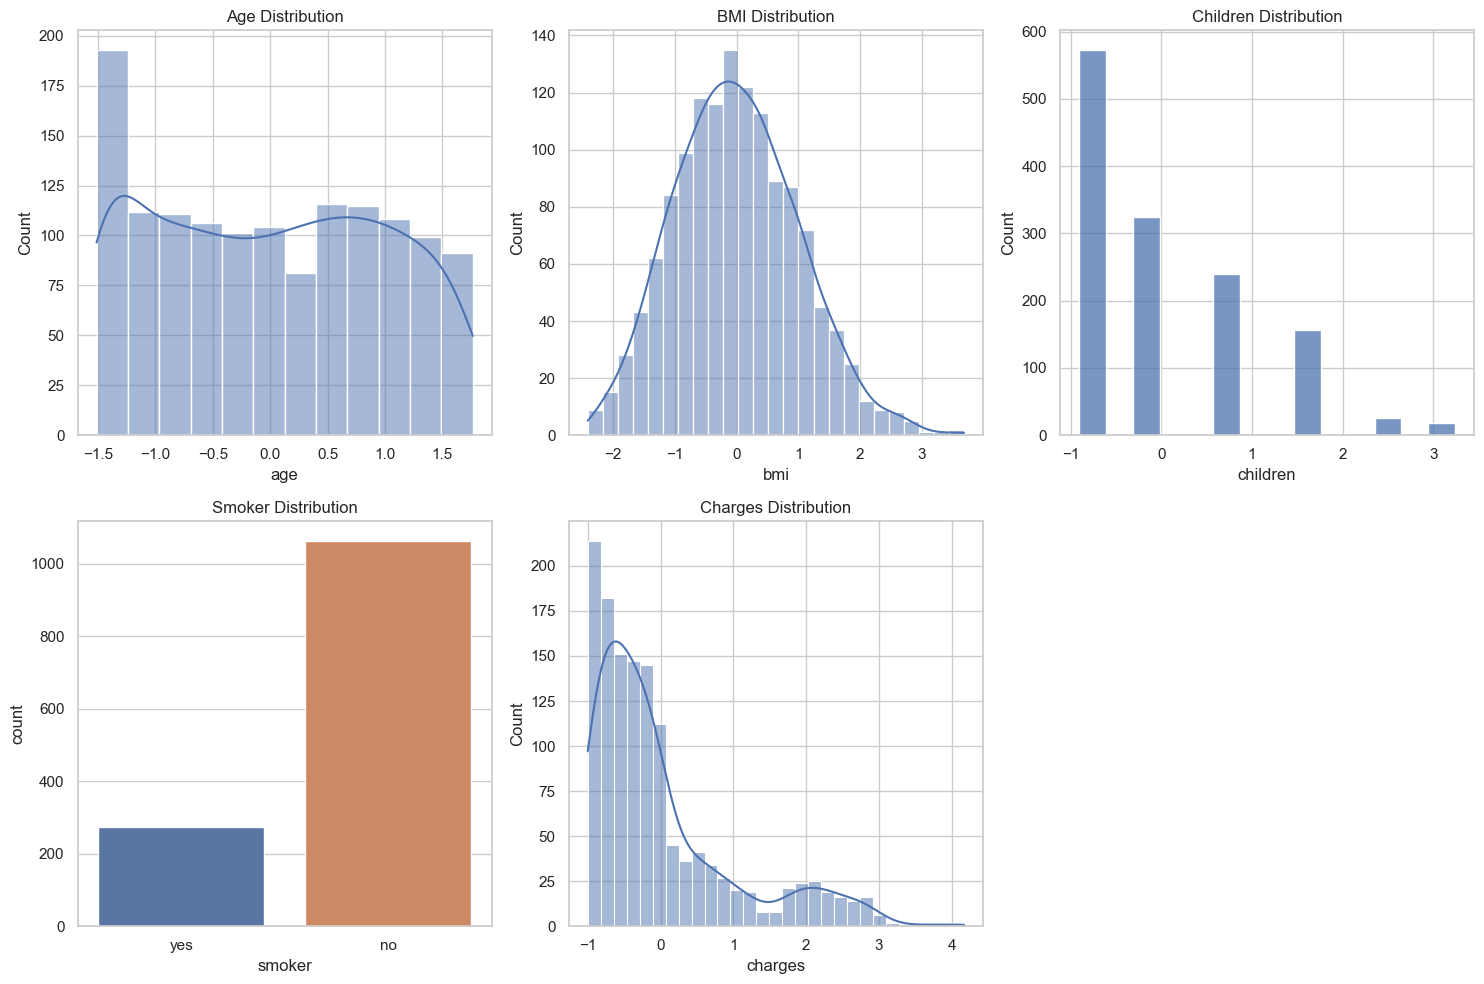

C:\Users\Ali Saif\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


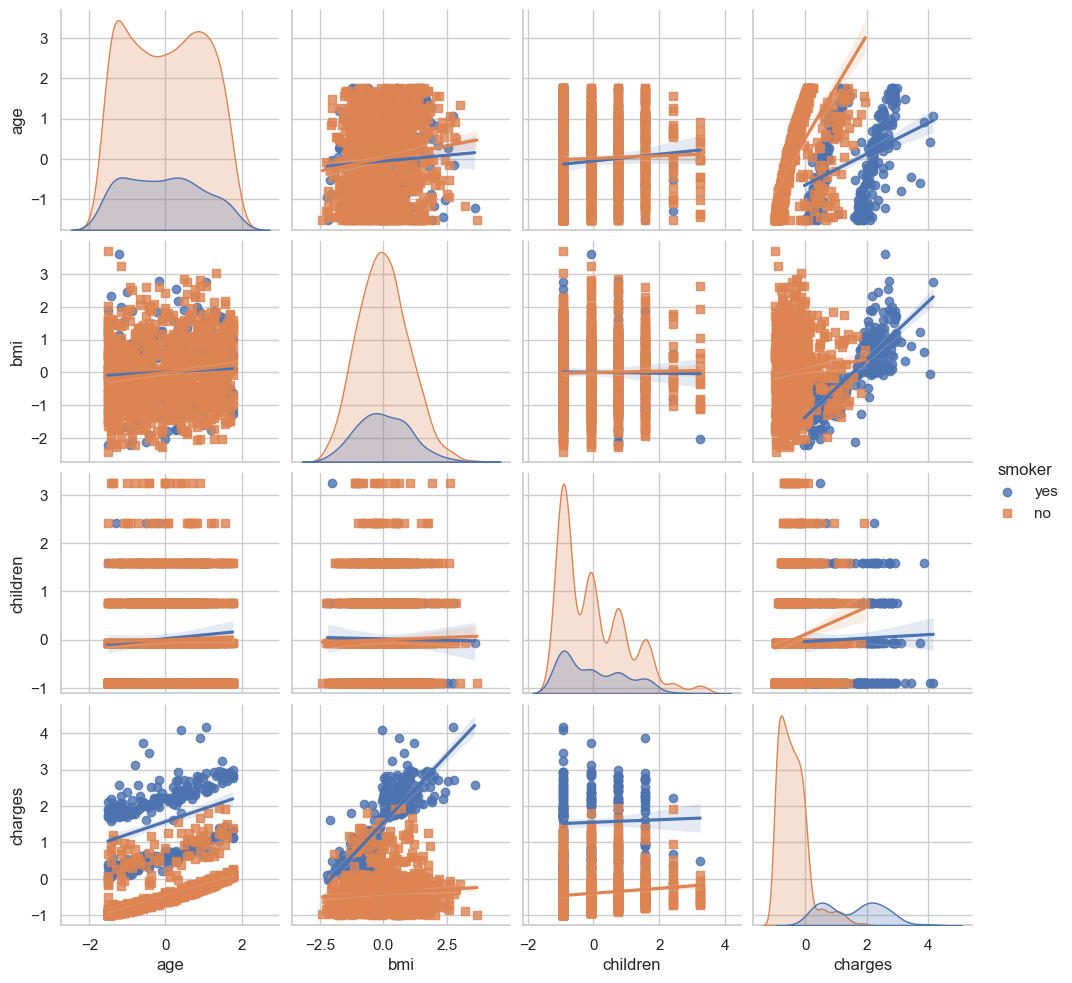

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Analyzing the distribution of key variables (age, bmi, children, smoker, charges)
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Age distribution
sns.histplot(insurance_data_cleaned['age'], kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Age Distribution')

# BMI distribution
sns.histplot(insurance_data_cleaned['bmi'], kde=True, ax=ax[0, 1])
ax[0, 1].set_title('BMI Distribution')

# Children distribution
sns.histplot(insurance_data_cleaned['children'], kde=False, ax=ax[0, 2])
ax[0, 2].set_title('Children Distribution')

# Smoker distribution
sns.countplot(x='smoker', data=insurance_data_cleaned, ax=ax[1, 0])
ax[1, 0].set_title('Smoker Distribution')

# Charges distribution
sns.histplot(insurance_data_cleaned['charges'], kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Charges Distribution')

# Removing empty subplot
fig.delaxes(ax[1,2])

plt.tight_layout()
plt.show()

# Investigating relationships between features and the target variable (Charges)
# Using pairplot for a comprehensive overview
sns.pairplot(insurance_data_cleaned, kind='reg', hue='smoker', markers=["o", "s"])
plt.show()

In [22]:
# Creating a heatmap/correlation matrix to identify the relationships between features and the target variable

# Calculating the correlation matrix
correlation_matrix = insurance_data_cleaned.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: 'female'

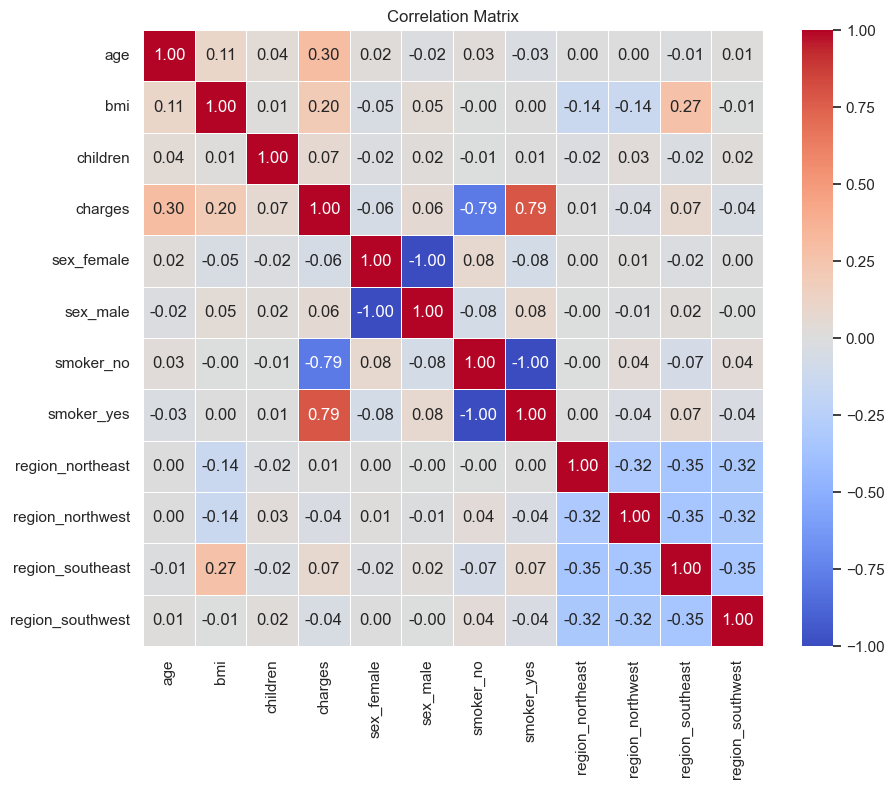

In [21]:
# Assuming 'insurance_data_cleaned' contains both numeric and categorical columns
# One-hot encode categorical columns
insurance_data_encoded = pd.get_dummies(insurance_data_cleaned)

# Calculate the correlation matrix
correlation_matrix = insurance_data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [23]:
# Removing outliers from the BMI column
# A common approach is to remove data that lies beyond 1.5 times the interquartile range (IQR)

# Calculating the IQR for BMI
Q1 = insurance_data_cleaned['bmi'].quantile(0.25)
Q3 = insurance_data_cleaned['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Defining the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the dataset to remove outliers
insurance_data_no_bmi_outliers = insurance_data_cleaned[(insurance_data_cleaned['bmi'] >= lower_bound) & 
                                                        (insurance_data_cleaned['bmi'] <= upper_bound)]

# Displaying the first few rows of the updated dataset
insurance_data_no_bmi_outliers.head()


,age,sex,bmi,children,smoker,region,charges
0,-1.440418,female,-0.453160,-0.909234,yes,southwest,0.297857
1,-1.511647,male,0.509422,-0.079442,no,southeast,-0.954381
2,-0.799350,male,0.383155,1.580143,no,southeast,-0.729373
3,-0.443201,male,-1.305052,-0.909234,no,northwest,0.719104
4,-0.514431,male,-0.292456,-0.909234,no,northwest,-0.777499
